In [1]:
import pandas as pd

In [2]:
filepath = '/Users/danielseymour/Developer/EC334-Summative/processed_data/hgfs_by_industry.csv'

df = pd.read_csv(filepath)

In [3]:
df.columns


Index(['year', 'vcnaics3', 'pct_high_growth_emp'], dtype='object')

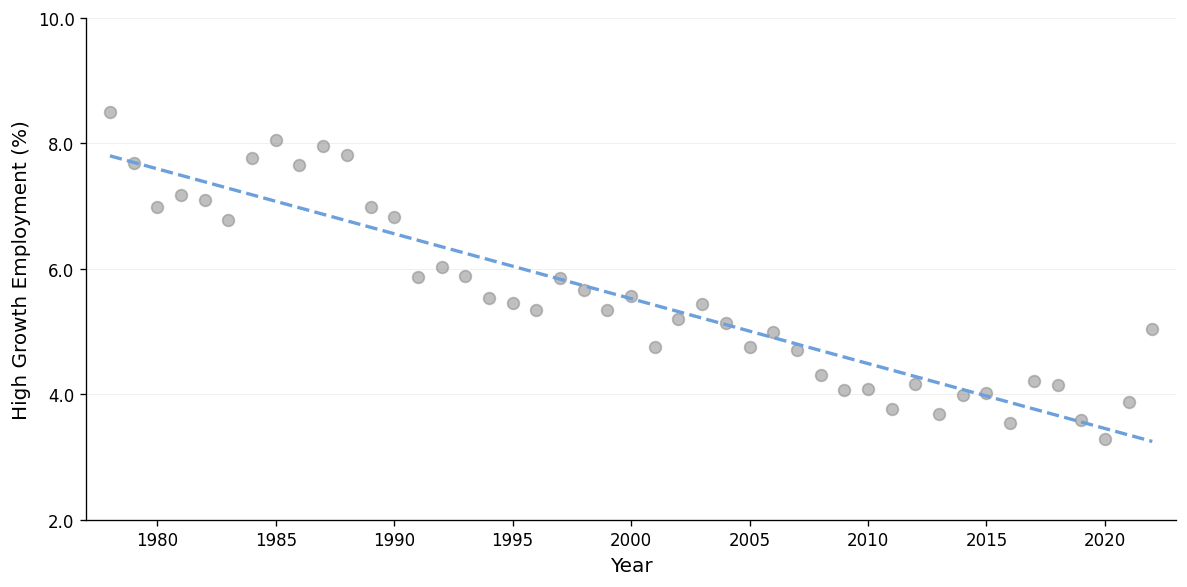

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# First, group by year and calculate the average percentage across all NAICS codes
df_plot = df.groupby('year')['pct_high_growth_emp'].mean().reset_index()

# Prepare data for linear regression
X = df_plot[['year']].values
y = df_plot['pct_high_growth_emp'].values
model = LinearRegression().fit(X, y)
y_trend = model.predict(X)

# Create the plot
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

# Scatter plot
ax.scatter(
    df_plot['year'],
    y,
    s=50,
    color='grey',
    alpha=0.5,
)

# Trend line
ax.plot(
    df_plot['year'],
    y_trend,
    linestyle='--',
    linewidth=2,
    color='#6CA0DC',
)

# Set x-axis ticks (every 5 years)
min_year = df_plot['year'].min()
max_year = df_plot['year'].max()
start_year = min_year - (min_year % 5)
if start_year < min_year:
    start_year += 5
    
x_ticks = range(start_year, max_year + 6, 5)
ax.set_xticks(x_ticks)

# Set y-axis limits and ticks (adjust these based on your data range)
y_min = y.min()
y_max = y.max()
y_range = y_max - y_min
y_lower = max(0, y_min - 0.1 * y_range)
y_upper = y_max + 0.1 * y_range

ax.set_ylim(y_lower, y_upper)
y_ticks = np.arange(int(y_lower), int(y_upper) + 2, 2)
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{x:.1f}')
ax.set_xlim(min_year - 1, max_year + 1)

# Style the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8) 
ax.spines['bottom'].set_linewidth(0.8)  

ax.grid(which='major', axis='y', linestyle='-', linewidth=0.4, color='#E0E0E0', alpha=0.7)
ax.set_axisbelow(True) 

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('High Growth Employment (%)', fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig('high_growth_employment_trend.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
from scipy.stats import linregress

# run a simple linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_plot['year'], df_plot['pct_high_growth_emp'])

print(f"Slope (coef): {slope:.4f}")
print(f"p-value: {p_value:.4g}")
print(f"R²: {r_value**2:.4f}")

Slope (coef): -0.1035
p-value: 4.556e-20
R²: 0.8614
